In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

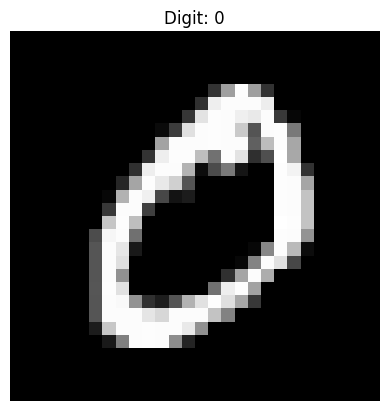

In [7]:
# Display the image
plt.imshow(x_train[1], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f"Digit: {y_train[1]}")
plt.axis('off')  # Hide axis
plt.show()

In [8]:
#x_train[1]

In [9]:
x_train[1].max()

255

In [10]:
x_train[1].min()

0

In [11]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
x_train[1].max()

1.0

In [13]:
x_train[1].min()

0.0

In [14]:
x_train[1].shape

(28, 28)

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [17]:
x_train[1].shape

(784,)

In [18]:
x_train.shape

(60000, 784)

In [19]:
from tensorflow import keras

# Define the ANN model
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Explicit Input Layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
#model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

In [23]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8730 - loss: 0.4308 - val_accuracy: 0.9572 - val_loss: 0.1389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9660 - loss: 0.1071 - val_accuracy: 0.9690 - val_loss: 0.1031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.9782 - loss: 0.0699 - val_accuracy: 0.9736 - val_loss: 0.0827
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9733 - val_loss: 0.0885
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.9867 - loss: 0.0412 - val_accuracy: 0.9743 - val_loss: 0.0844
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9894 - loss: 0.0311 - val_accuracy: 0.9773 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9643 - val_loss: 0.1389
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9928 - los

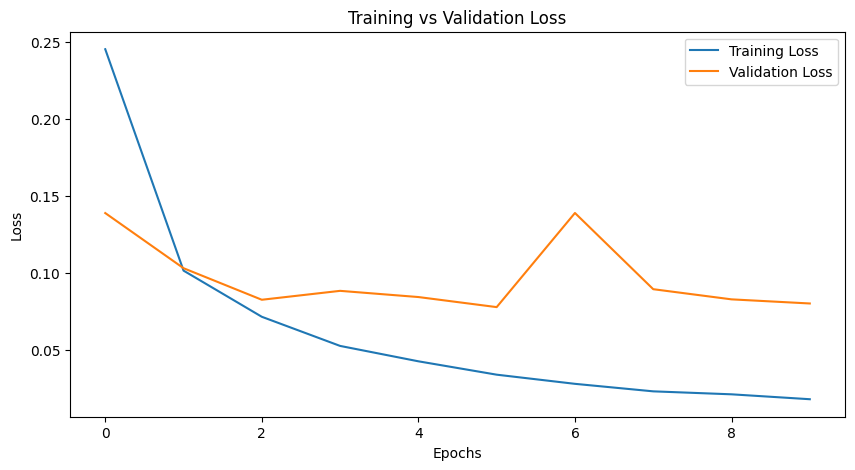

In [24]:
# Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9775 - loss: 0.0985
Test accuracy: 0.9802


In [26]:
# Predict on test images
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


In [27]:
# Display an example
def plot_image(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()

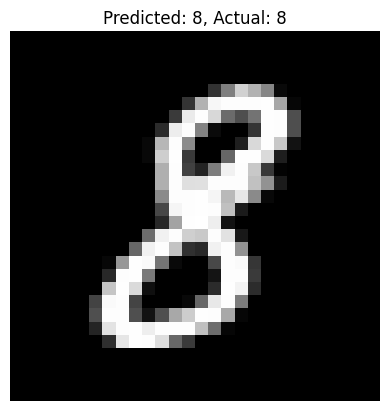

In [28]:
plot_image(110)  # Show the first test image